<a href="http://lnls.cnpem.br/"><img src="http://fig.if.usp.br/~biofisic/images/logo_lnls.jpg" style="width:90px; float: left;"></a><h1> Temperature versus flow rate S15</h1>

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline 

In [109]:
# Modifying the plot style
style.use('seaborn')

In [3]:
#Data files
_vazao1 = pd.read_csv('vazao1.txt', sep='\t', header=0)
_vazao15 = pd.read_csv('vazao15.txt', sep='\t', header=0)
_vazao20 = pd.read_csv('vazao20.txt', sep='\t', header=0)

In [4]:
_vazao1.head(3)

,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C)
0,-360.67605,0.000072,7.648,24.527,23.456
1,-360.67624,0.000071,8.032,24.729,23.320
2,-360.67839,0.000069,8.033,24.748,23.292


In [141]:
_vazao1['Campo(T.m)'].values[:5]

array([-360.67605, -360.67624, -360.67839, -360.6801 , -360.68131])

In [6]:
#Creating DataFrame for specific flow rate
_datavars = ['Campo(T.m)',
             'Ang(rad)',
             'X(um)',
             'Y(um)',
             'Temp(C)']

#Values for flow rate 1
_datavalues_1 = [_vazao1['Campo(T.m)'].get_values(),
                 _vazao1['Ang(rad)'].get_values(),
                 _vazao1['X(um)'].get_values(),
                 _vazao1['Y(um)'].get_values(),
                 _vazao1['Temp(C)'].get_values()]
#Values for flow rate 1.5
_datavalues_15 = [_vazao15['Campo(T.m)'].get_values(),
                 _vazao15['Ang(rad)'].get_values(),
                 _vazao15['X(um)'].get_values(),
                 _vazao15['Y(um)'].get_values(),
                 _vazao15['Temp(C)'].get_values()]
#Values for flow rate 2.0
_datavalues_20 = [_vazao20['Campo(T.m)'].get_values(),
                 _vazao20['Ang(rad)'].get_values(),
                 _vazao20['X(um)'].get_values(),
                 _vazao20['Y(um)'].get_values(),
                 _vazao20['Temp(C)'].get_values()]

#Dataframes
_df1 = pd.DataFrame({'datavars': _datavars,
                     'datavalues': _datavalues_1})
_df15 = pd.DataFrame({'datavars': _datavars,
                     'datavalues': _datavalues_15})
_df20 = pd.DataFrame({'datavars': _datavars,
                     'datavalues': _datavalues_20})

#DF specific for flow1
flow1 = _df1.set_index('datavars')

#DF specific for flow15
flow15 = _df15.set_index('datavars')

#DF specific for flow20
flow20 = _df20.set_index('datavars')



In [7]:
flow1.datavalues[0]

array([-360.67605, -360.67624, -360.67839, -360.6801 , -360.68131,
       -360.68215, -360.68293, -360.68453, -360.68468, -360.68546,
       -360.68522, -360.68538, -360.68599, -360.68523, -360.68573,
       -360.68563, -360.68536, -360.68626, -360.68625, -360.68596,
       -360.68633, -360.68579, -360.68587, -360.68576, -360.68565,
       -360.68569, -360.6854 , -360.68574, -360.6857 , -360.68517,
       -360.68477, -360.68427, -360.68449, -360.6844 , -360.68478,
       -360.6855 , -360.6847 , -360.68447, -360.68454, -360.68417,
       -360.68414, -360.6849 , -360.68393, -360.68441, -360.68357,
       -360.68395, -360.68363, -360.68379, -360.68355, -360.68339,
       -360.68319, -360.68263, -360.68264, -360.68269, -360.6828 ,
       -360.68312, -360.68214, -360.68146, -360.68229, -360.68159,
       -360.68157, -360.68179, -360.68175, -360.68094, -360.68109,
       -360.68101, -360.68124, -360.68017, -360.68111, -360.68054,
       -360.68016, -360.68048, -360.6801 , -360.67976, -360.67

Text(0.5,0,'# Measure')

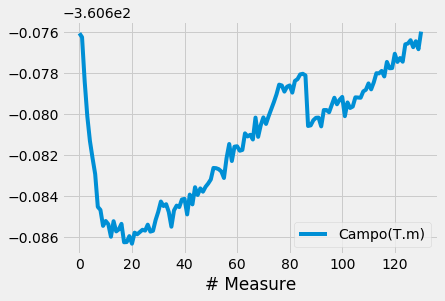

In [8]:
#Ploting files
#_df1.plot(np.arange(0,len(_df1.datavalues[0])), _df1.datavalues[0], style='-')
ax = _vazao1.plot(x=_vazao1.index, y='Campo(T.m)', style='-')
ax.set_xlabel('# Measure')

In [9]:
# Array for polyfitting
_x_axis = np.linspace(1,len(_df1.datavalues[0]), len(_df1.datavalues[0]))
poly = np.polyfit(_x_axis,_df1.datavalues[0],8)
ploy1d = np.poly1d(poly)
print(ploy1d)

          8             7             6            5             4
7.55e-17 x - 4.987e-14 x + 1.336e-11 x - 1.88e-09 x + 1.508e-07 x
             3             2
 - 7.02e-06 x + 0.0001859 x - 0.002516 x - 360.7


Text(0.5,0,'# Measure')

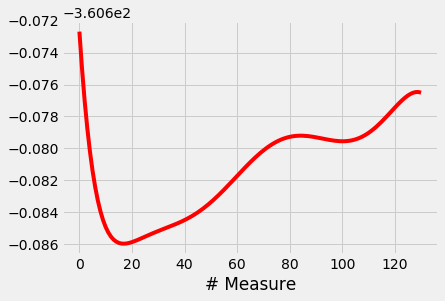

In [10]:
poly_fit_graph = []
for i in range(len(_x_axis)):   
    num = ploy1d(i)
    poly_fit_graph.append(float(num))
plt.plot(poly_fit_graph, 'r-')
plt.xlabel('# Measure')

### Plot fit polynomial curve (in Matplotlib)

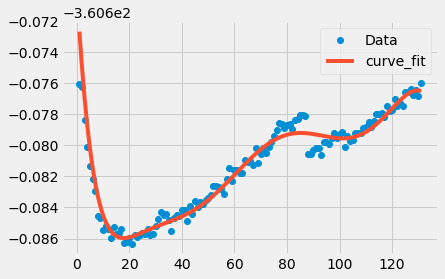

In [11]:
plt.plot(_x_axis,_df1.datavalues[0],'o', _x_axis ,poly_fit_graph,'-')
plt.legend(['Data','curve_fit'], loc='best')
#plt.title('1L/min flow rate')

In [19]:
# Adding new column "Fitting" in "_vazao1" Dataframe
_vazao1['Fitting'] = pd.Series(poly_fit_graph, index=_vazao1.index)

In [20]:
_vazao1.head(3)

,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C),Fitting
0,-360.67605,0.000072,7.648,24.527,23.456,-360.672682
1,-360.67624,0.000071,8.032,24.729,23.320,-360.675019
2,-360.67839,0.000069,8.033,24.748,23.292,-360.677024


### Plot same curve in pandas plot

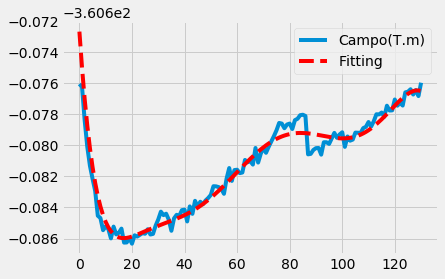

In [21]:
ax = _vazao1.plot(x=_vazao1.index, y='Campo(T.m)', style='-')
_vazao1.plot(ax=ax, x=_vazao1.index, y='Fitting', style='r--')

In [12]:
# Find derivative curve
_deriv = ploy1d.deriv()  #f'(x)
print(_deriv)

          7             6             5             4             3
6.04e-16 x - 3.491e-13 x + 8.014e-11 x - 9.399e-09 x + 6.032e-07 x
              2
 - 2.106e-05 x + 0.0003719 x - 0.002516


In [13]:
from sympy.solvers import solve
rt = solve(_deriv)
print(rt)

[]


In [14]:
#Find y coordinate of a x at 0
ploy1d(0)

-360.6726822512729

In [55]:
tan = []
tan_final = np.array([])
for i in range(len(_df1.datavalues[0])):
    tan.append(ploy1d(21)+_deriv(21)*(i-21)) #Tangent function at minimum point
    tan_final = np.append(tan_final,tan[i])    

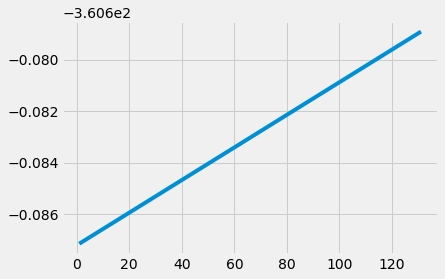

In [56]:
plt.plot(_x_axis, tan_final)

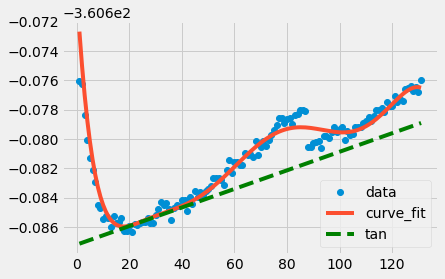

In [57]:
plt.plot(_x_axis,_df1.datavalues[0],'o', _x_axis ,poly_fit_graph,'-', _x_axis, tan_final, 'g--')
plt.legend(['data','curve_fit','tan'], loc='best')

In [16]:
_vazao1.describe()

,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C)
count,131.000000,1.310000e+02,131.000000,131.000000,131.000000
mean,-360.681277,6.986870e-05,8.146435,24.886481,23.814832
std,0.003036,4.864446e-07,0.088784,0.055691,0.211610
min,-360.686330,6.880000e-05,7.648000,24.527000,23.292000
25%,-360.684335,6.960000e-05,8.090000,24.860000,23.670500
50%,-360.680580,6.990000e-05,8.146000,24.896000,23.869000
75%,-360.678800,7.015000e-05,8.172500,24.922500,23.959000
max,-360.675970,7.180000e-05,8.323000,24.962000,24.159000


### Flow rate 1.5L

Text(0.5,0,'# Measure')

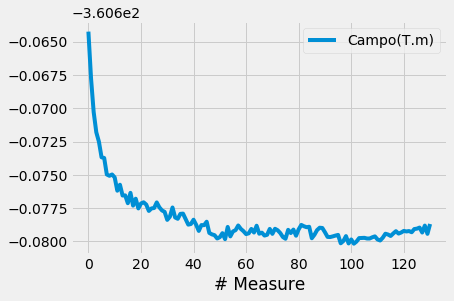

In [59]:
ax15 = _vazao15.plot(x=_vazao15.index, y='Campo(T.m)', style='-')
ax15.set_xlabel('# Measure')

In [75]:
# Array for polyfitting
_x_axis = np.linspace(1,len(_df15.datavalues[0]), len(_df15.datavalues[0]))
_poly15 = np.polyfit(_x_axis,_df15.datavalues[0],8)  #Fitting polynomial 1.5 flow rate data
_poly15d = np.poly1d(_poly15)
print(_poly15d)

           8             7             6             5             4
1.107e-16 x - 6.665e-14 x + 1.663e-11 x - 2.223e-09 x + 1.716e-07 x
             3             2
 - 7.71e-06 x + 0.0001941 x - 0.002553 x - 360.7


Text(0.5,0,'# Measure')

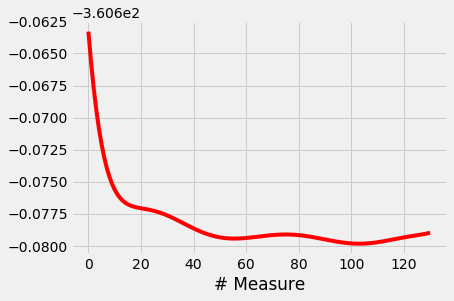

In [76]:
#Polyfitting Array
_15_poly_fit_graph = []
for i in range(len(_x_axis)):   
    _num = _poly15d(i)
    _15_poly_fit_graph.append(float(_num))
plt.plot(_15_poly_fit_graph, 'r-')
plt.xlabel('# Measure')

In [77]:
# Adding new column "Fitting" in "_vazao15" Dataframe
_vazao15['Fitting'] = pd.Series(_15_poly_fit_graph, index=_vazao15.index)

Text(0.5,0,'# Measure')

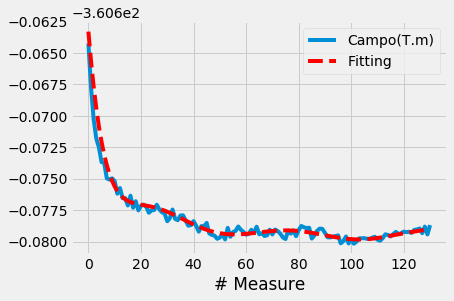

In [80]:
ax15 = _vazao15.plot(x=_vazao15.index, y='Campo(T.m)', style='-')
_vazao15.plot(ax=ax15, x=_vazao15.index, y='Fitting', style='r--')
ax15.set_xlabel('# Measure')

In [93]:
#Min value of Integrated field
_vazao15.loc[_vazao15['Campo(T.m)'].idxmin()]

Campo(T.m)   -360.680170
Ang(rad)        0.000069
X(um)           8.066000
Y(um)          24.308000
Temp(C)        23.508000
Fitting      -360.679821
Name: 101, dtype: float64

In [95]:
#Index of Min value of Integrated field (T.m)
_vazao15.idxmin()

Campo(T.m)    101
Ang(rad)       28
X(um)         127
Y(um)         130
Temp(C)         0
Fitting       103
dtype: int64

In [96]:
# Find derivative curve
dy = _poly15d.deriv()  #f'(x)
print(dy)

           7             6            5             4             3
8.857e-16 x - 4.665e-13 x + 9.98e-11 x - 1.112e-08 x + 6.865e-07 x
              2
 - 2.313e-05 x + 0.0003882 x - 0.002553


In [102]:
tan = np.array([])
for i in range(len(_df15.datavalues[0])):
    tan = np.append(tan,_poly15d(101)+dy(101)*(i-101)) #Tangent function at minimum point

In [111]:
# Adding new column "tangent" in "_vazao15" Dataframe
_vazao15['Tangent'] = pd.Series(tan, index=_vazao15.index)

In [120]:
#_vazao15 = _vazao15.drop(columns=['tangent'])

Text(0.5,0,'# Measure')

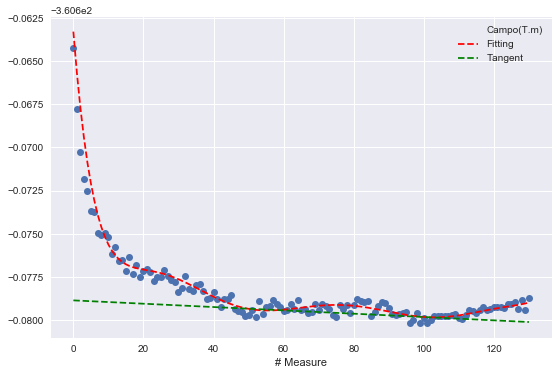

In [122]:
ax15 = _vazao15.plot(x=_vazao15.index, y='Campo(T.m)', style='o')
_vazao15.plot(ax=ax15, x=_vazao15.index, y='Fitting', style='r--')
_vazao15.plot(ax=ax15, x=_vazao15.index, y='Tangent', style='g--')
ax15.set_xlabel('# Measure')

In [125]:
_vazao15.head(3)

,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C),Fitting,Tangent
0,-360.66424,0.000069,8.049,24.923,23.264,-360.663297,-360.678848
1,-360.66775,0.000069,8.059,24.939,23.295,-360.665663,-360.678858
2,-360.67028,0.000068,8.064,24.922,23.302,-360.667685,-360.678868


In [129]:
#Test pandas groupby
#_vazao15.groupby(["Campo(T.m)", "Ang(rad)"]).count()

### Flow rate 2.0L

Text(0.5,0,'# Measure')

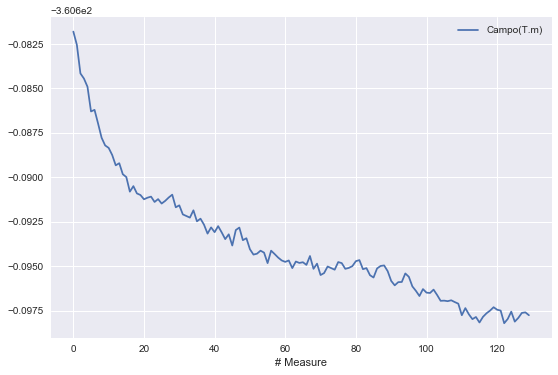

In [123]:
ax20 = _vazao20.plot(x=_vazao20.index, y='Campo(T.m)', style='-')
ax20.set_xlabel('# Measure')

In [140]:
# Array for polyfitting
_x_axis = np.linspace(1,len(_df20.datavalues[0]), len(_df20.datavalues[0]))
_poly20 = np.polyfit(_x_axis,_df20.datavalues[0],8)  #Fitting polynomial 2.0 flow rate data
_poly20d = np.poly1d(_poly20)
#print(_poly20d)

#Polyfitting Array
_20_poly_fit_graph = []
for i in range(len(_x_axis)):   
    _num = _poly20d(i)
    _20_poly_fit_graph.append(float(_num))


Text(0.5,0,'# Measure')

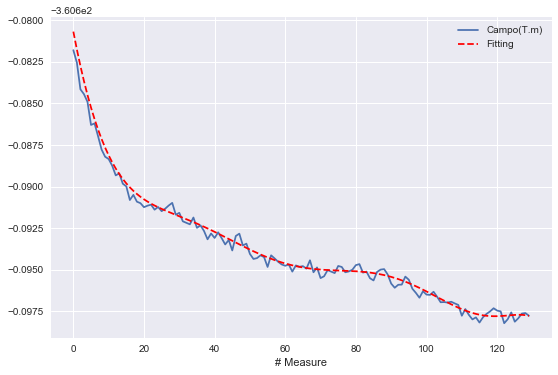

In [132]:
# Adding new column "Fitting" in "_vazao20" Dataframe
_vazao20['Fitting'] = pd.Series(_20_poly_fit_graph, index=_vazao20.index)

# Plotting
ax20 = _vazao20.plot(x=_vazao20.index, y='Campo(T.m)', style='-')
_vazao20.plot(ax=ax20, x=_vazao20.index, y='Fitting', style='r--')
ax20.set_xlabel('# Measure')

In [133]:
#Index of Min value of Integrated field (T.m)
_vazao20.idxmin()

Campo(T.m)    122
Ang(rad)       93
X(um)          94
Y(um)         129
Temp(C)         0
Fitting       119
dtype: int64

In [134]:
# Find derivative curve
dy = _poly20d.deriv()  #f'(x)
print(dy)

            7             6             5             4             3
-4.502e-16 x + 1.858e-13 x - 2.847e-11 x + 1.878e-09 x - 3.324e-08 x
              2
 - 1.846e-06 x + 8.781e-05 x - 0.001116


In [136]:
tan = np.array([])
for i in range(len(_df20.datavalues[0])):
    tan = np.append(tan,_poly20d(122)+dy(122)*(i-122)) #Tangent function at minimum point

In [138]:
# Adding new column "tangent" in "_vazao15" Dataframe
_vazao20['Tangent'] = pd.Series(tan, index=_vazao20.index)
_vazao20.head(3)

,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C),Fitting,Tangent
0,-360.68181,0.000076,6.998,28.140,23.125,-360.680694,-360.699787
1,-360.68256,0.000075,6.985,28.102,23.135,-360.681767,-360.699771
2,-360.68416,0.000072,6.984,28.084,23.136,-360.682755,-360.699754


Text(0.5,0,'# Measure')

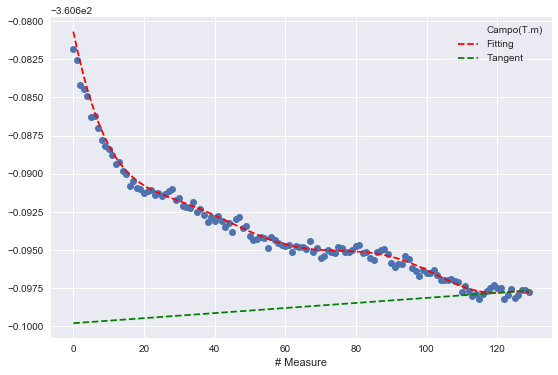

In [139]:
ax20 = _vazao20.plot(x=_vazao20.index, y='Campo(T.m)', style='o')
_vazao20.plot(ax=ax20, x=_vazao20.index, y='Fitting', style='r--')
_vazao20.plot(ax=ax20, x=_vazao20.index, y='Tangent', style='g--')
ax20.set_xlabel('# Measure')

[ 1.65793866e-05 -3.60699804e+02]


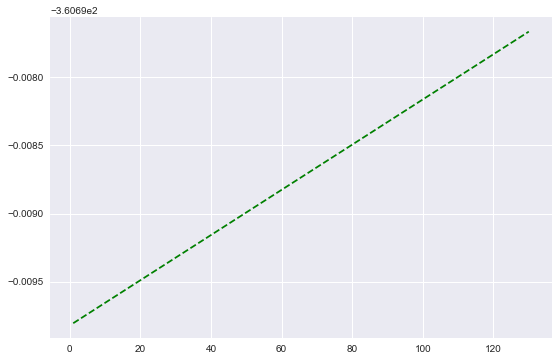

In [151]:
#Testing inclination calculus for tangent
_x_axis = np.linspace(1,len(_df20.datavalues[0]), len(_df20.datavalues[0]))
_tan_fit = np.polyfit(_x_axis,_vazao20['Tangent'].get_values(),1)  #Fitting polynomial tangent 2.0 flow rate at minimum
_tan_fitd = np.poly1d(_tan_fit)
print(_tan_fit)

#Polyfitting Array
_tan_fit_graph = []
for i in range(len(_x_axis)):   
    _num = _tan_fitd(i)
    _tan_fit_graph.append(float(_num))

plt.plot(_x_axis, _tan_fit_graph, 'g--')

### Global DataFrame with Flow Rates

In [184]:
_df_teste = _vazao1

In [186]:
_df_teste =_df_teste.join(_vazao15, lsuffix='Flow 1.0', rsuffix='Flow 1.5')

In [187]:
_df_teste = _df_teste.join(_vazao20, lsuffix='Flow 1.5', rsuffix='Flow 2.0')

In [189]:
_df_teste.head(5)

,Campo(T.m)Flow 1.0,Ang(rad)Flow 1.0,X(um)Flow 1.0,Y(um)Flow 1.0,Temp(C)Flow 1.0,FittingFlow 1.0,Campo(T.m)Flow 1.5,Ang(rad)Flow 1.5,X(um)Flow 1.5,Y(um)Flow 1.5,Temp(C)Flow 1.5,FittingFlow 1.5,TangentFlow 1.5,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C),Fitting,TangentFlow 2.0
0,-360.67605,0.000072,7.648,24.527,23.456,-360.672682,-360.66424,0.000069,8.049,24.923,23.264,-360.663297,-360.678848,-360.68181,0.000076,6.998,28.140,23.125,-360.680694,-360.699787
1,-360.67624,0.000071,8.032,24.729,23.320,-360.675019,-360.66775,0.000069,8.059,24.939,23.295,-360.665663,-360.678858,-360.68256,0.000075,6.985,28.102,23.135,-360.681767,-360.699771
2,-360.67839,0.000069,8.033,24.748,23.292,-360.677024,-360.67028,0.000068,8.064,24.922,23.302,-360.667685,-360.678868,-360.68416,0.000072,6.984,28.084,23.136,-360.682755,-360.699754
3,-360.68010,0.000069,8.029,24.756,23.332,-360.678734,-360.67180,0.000069,8.073,24.938,23.323,-360.669404,-360.678877,-360.68445,0.000073,6.991,28.079,23.160,-360.683664,-360.699738
4,-360.68131,0.000069,8.038,24.762,23.352,-360.680182,-360.67251,0.000068,8.078,24.956,23.357,-360.670855,-360.678887,-360.68491,0.000072,6.992,28.066,23.178,-360.684496,-360.699721


In [192]:
_df_teste.groupby(['Campo(T.m)Flow 1.0','Campo(T.m)Flow 1.5','Campo(T.m)']).max().head(10)

,,,Ang(rad)Flow 1.0,X(um)Flow 1.0,Y(um)Flow 1.0,Temp(C)Flow 1.0,FittingFlow 1.0,Ang(rad)Flow 1.5,X(um)Flow 1.5,Y(um)Flow 1.5,Temp(C)Flow 1.5,FittingFlow 1.5,TangentFlow 1.5,Ang(rad),X(um),Y(um),Temp(C),Fitting,TangentFlow 2.0
Campo(T.m)Flow 1.0,Campo(T.m)Flow 1.5,Campo(T.m),,,,,,,,,,,,,,,,,
-360.68633,-360.67715,-360.69124,0.000070,8.092,24.915,23.600,-360.685872,0.000069,8.075,24.987,23.462,-360.677066,-360.679041,0.000071,7.042,27.882,23.330,-360.690767,-360.699456
-360.68626,-360.67731,-360.69050,0.000070,8.078,24.895,23.554,-360.685972,0.000068,8.085,24.987,23.473,-360.676928,-360.679012,0.000071,7.024,27.938,23.315,-360.690260,-360.699505
-360.68625,-360.67679,-360.69091,0.000069,8.080,24.909,23.610,-360.685956,0.000069,8.097,24.994,23.479,-360.676983,-360.679022,0.000072,7.034,27.927,23.322,-360.690448,-360.699489
-360.68599,-360.67574,-360.68933,0.000070,8.069,24.851,23.516,-360.685528,0.000069,8.075,24.968,23.411,-360.676252,-360.678964,0.000072,7.018,27.982,23.266,-360.688916,-360.699588
-360.68596,-360.67752,-360.69100,0.000069,8.074,24.908,23.618,-360.685921,0.000068,8.099,24.987,23.460,-360.677028,-360.679031,0.000071,7.034,27.896,23.328,-360.690616,-360.699472
-360.68587,-360.67723,-360.69109,0.000070,8.096,24.930,23.585,-360.685747,0.000069,8.092,24.983,23.462,-360.677139,-360.679060,0.000071,7.039,27.847,23.345,-360.691027,-360.699423
-360.68579,-360.67706,-360.69115,0.000069,8.074,24.923,23.573,-360.685813,0.000069,8.077,24.985,23.457,-360.677102,-360.679051,0.000071,7.040,27.877,23.343,-360.690903,-360.699439
-360.68576,-360.67771,-360.69139,0.000070,8.094,24.922,23.614,-360.685676,0.000068,8.087,24.981,23.473,-360.677178,-360.679070,0.000072,7.033,27.834,23.348,-360.691140,-360.699406
-360.68574,-360.67744,-360.69114,0.000070,8.120,24.933,23.662,-360.685384,0.000069,8.081,24.997,23.449,-360.677393,-360.679108,0.000071,7.001,27.804,23.326,-360.691526,-360.699340


In [203]:
_df_teste.groupby(['Campo(T.m)Flow 1.0','Campo(T.m)Flow 1.5','Campo(T.m)'], as_index=False).max().head(10)

,Campo(T.m)Flow 1.0,Campo(T.m)Flow 1.5,Campo(T.m),Ang(rad)Flow 1.0,X(um)Flow 1.0,Y(um)Flow 1.0,Temp(C)Flow 1.0,FittingFlow 1.0,Ang(rad)Flow 1.5,X(um)Flow 1.5,Y(um)Flow 1.5,Temp(C)Flow 1.5,FittingFlow 1.5,TangentFlow 1.5,Ang(rad),X(um),Y(um),Temp(C),Fitting,TangentFlow 2.0
0,-360.68633,-360.67715,-360.69124,0.000070,8.092,24.915,23.600,-360.685872,0.000069,8.075,24.987,23.462,-360.677066,-360.679041,0.000071,7.042,27.882,23.330,-360.690767,-360.699456
1,-360.68626,-360.67731,-360.69050,0.000070,8.078,24.895,23.554,-360.685972,0.000068,8.085,24.987,23.473,-360.676928,-360.679012,0.000071,7.024,27.938,23.315,-360.690260,-360.699505
2,-360.68625,-360.67679,-360.69091,0.000069,8.080,24.909,23.610,-360.685956,0.000069,8.097,24.994,23.479,-360.676983,-360.679022,0.000072,7.034,27.927,23.322,-360.690448,-360.699489
3,-360.68599,-360.67574,-360.68933,0.000070,8.069,24.851,23.516,-360.685528,0.000069,8.075,24.968,23.411,-360.676252,-360.678964,0.000072,7.018,27.982,23.266,-360.688916,-360.699588
4,-360.68596,-360.67752,-360.69100,0.000069,8.074,24.908,23.618,-360.685921,0.000068,8.099,24.987,23.460,-360.677028,-360.679031,0.000071,7.034,27.896,23.328,-360.690616,-360.699472
5,-360.68587,-360.67723,-360.69109,0.000070,8.096,24.930,23.585,-360.685747,0.000069,8.092,24.983,23.462,-360.677139,-360.679060,0.000071,7.039,27.847,23.345,-360.691027,-360.699423
6,-360.68579,-360.67706,-360.69115,0.000069,8.074,24.923,23.573,-360.685813,0.000069,8.077,24.985,23.457,-360.677102,-360.679051,0.000071,7.040,27.877,23.343,-360.690903,-360.699439
7,-360.68576,-360.67771,-360.69139,0.000070,8.094,24.922,23.614,-360.685676,0.000068,8.087,24.981,23.473,-360.677178,-360.679070,0.000072,7.033,27.834,23.348,-360.691140,-360.699406
8,-360.68574,-360.67744,-360.69114,0.000070,8.120,24.933,23.662,-360.685384,0.000069,8.081,24.997,23.449,-360.677393,-360.679108,0.000071,7.001,27.804,23.326,-360.691526,-360.699340
9,-360.68573,-360.67654,-360.68983,0.000070,8.070,24.866,23.515,-360.685842,0.000069,8.085,24.970,23.454,-360.676635,-360.678983,0.000071,7.013,27.956,23.284,-360.689547,-360.699555


In [194]:
_df_teste2 = _df_teste.groupby(['Campo(T.m)Flow 1.0','Campo(T.m)Flow 1.5','Campo(T.m)'], as_index=False).max()

Text(0.5,0,'# Measure')

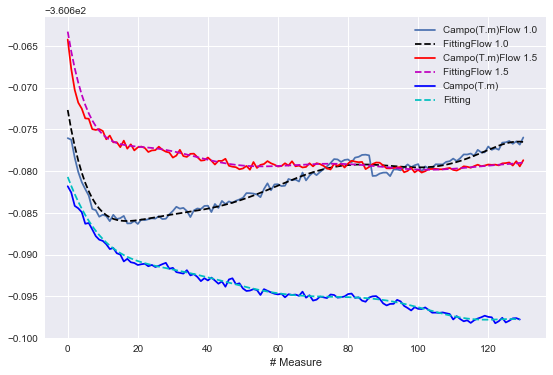

In [207]:
# Plotting Integrated magnetic Fields
ax_global = _df_teste.plot(x=_df_teste.index, y='Campo(T.m)Flow 1.0', style='-')
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='FittingFlow 1.0', style='k--')
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='Campo(T.m)Flow 1.5', style='r-',markersize=5)
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='FittingFlow 1.5', style='m--')
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='Campo(T.m)', style='b-', markersize=5)
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='Fitting', style='c--')
ax_global.set_xlabel('# Measure')

Text(0.5,0,'# Measure')

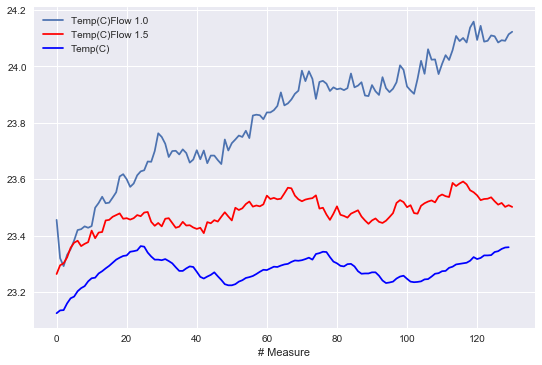

In [209]:
# Plotting Temperatures
ax_global = _df_teste.plot(x=_df_teste.index, y='Temp(C)Flow 1.0', style='-')
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='Temp(C)Flow 1.5', style='r-', markersize=5)
_df_teste.plot(ax=ax_global, x=_df_teste.index, y='Temp(C)', style='b-', markersize=5)
ax_global.set_xlabel('# Measure')

### Calculating the fit linear for temperatures

In [222]:
_temp1 = np.polyfit(_x_axis,_vazao1['Temp(C)'].iloc[:130],1)
_temp1d = np.poly1d(_temp1)
_temp15 = np.polyfit(_x_axis,_vazao15['Temp(C)'].iloc[:130],1)
_temp15d = np.poly1d(_temp15)
_temp20 = np.polyfit(_x_axis,_vazao20['Temp(C)'].iloc[:130],1)
_temp20d = np.poly1d(_temp20)

_temp1_graph = []
_temp15_graph = []
_temp20_graph = []
for i in range(len(_x_axis)):   
    _num = _temp1d(i)
    _temp1_graph.append(float(_num))
    _num = _temp15d(i)
    _temp15_graph.append(float(_num))
    _num = _temp20d(i)
    _temp20_graph.append(float(_num))
    

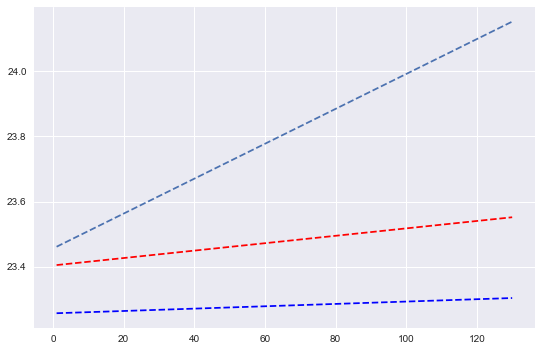

In [225]:
plt.plot(_x_axis, _temp1_graph, '--', _x_axis, _temp15_graph, 'r--', _x_axis, _temp20_graph,'b--')

In [246]:
#Inclinations of temperature fitting curves
#FLow rate 1 L/min
print('Inclination for flow rate 1.0L/min: %f' %_temp1d[1])

#FLow rate 1 L/min
print('Inclination for flow rate 1.5L/min: %f' %_temp15d[1])

#FLow rate 1 L/min
print('Inclination for flow rate 2.0L/min: %f' %_temp20d[1])

Inclination for flow rate 1.0L/min: 0.005367
Inclination for flow rate 1.5L/min: 0.001140
Inclination for flow rate 2.0L/min: 0.000362


## Adding prediction system for others flow rates

In [245]:
'''Initialize with input data and output data'''
#Testing for 1.5 flow rate
_enter_15 = pd.DataFrame()


'Initialize with input data and output data'

In [347]:
#_vazao15['Campo(T.m)'].iloc[:]

In [255]:
_vazao15.head(5)

,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C),Fitting,Tangent
0,-360.66424,0.000069,8.049,24.923,23.264,-360.663297,-360.678848
1,-360.66775,0.000069,8.059,24.939,23.295,-360.665663,-360.678858
2,-360.67028,0.000068,8.064,24.922,23.302,-360.667685,-360.678868
3,-360.67180,0.000069,8.073,24.938,23.323,-360.669404,-360.678877
4,-360.67251,0.000068,8.078,24.956,23.357,-360.670855,-360.678887


In [265]:
_enter_15 = _vazao15.drop(['Ang(rad)', 'Fitting', 'Tangent', 'Temp(C)'], axis=1)

In [266]:
_enter_15.head(5)

,Campo(T.m),X(um),Y(um)
0,-360.66424,8.049,24.923
1,-360.66775,8.059,24.939
2,-360.67028,8.064,24.922
3,-360.67180,8.073,24.938
4,-360.67251,8.078,24.956


In [267]:
_outs_15 = _vazao15.drop(['Campo(T.m)', 'Ang(rad)','X(um)','Y(um)','Fitting','Tangent'], axis=1)
_outs_15.head(5)

,Temp(C)
0,23.264
1,23.295
2,23.302
3,23.323
4,23.357


In [286]:
_enter_15.iloc[:10].values

array([[-360.66424,    8.049  ,   24.923  ],
       [-360.66775,    8.059  ,   24.939  ],
       [-360.67028,    8.064  ,   24.922  ],
       [-360.6718 ,    8.073  ,   24.938  ],
       [-360.67251,    8.078  ,   24.956  ],
       [-360.67368,    8.077  ,   24.964  ],
       [-360.67373,    8.083  ,   24.958  ],
       [-360.67497,    8.088  ,   24.967  ],
       [-360.67507,    8.088  ,   24.958  ],
       [-360.67497,    8.078  ,   24.959  ]])

In [277]:
_outs_15.iloc[0].values

array([23.264])

In [282]:
#Libries for predicts
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#Testing predict algorithms
K = 2      #number neighbors
knn = KNeighborsRegressor(n_neighbors=K) 
knn.fit(_enter_15.values, _outs_15.values)        # (enters, outs)
print(_outs_15.iloc[0].values)                    # Print real output in dataset
print(knn.predict([_enter_15.iloc[0].values]))    # Print prediction outpus

[23.264]
[[23.283]]


In [285]:
accu = knn.score(_enter_15,_outs_15)
accu

0.9566247960295432

In [341]:
#Making preditions
_knn = KNeighborsRegressor(n_neighbors=2)
_enters, _outs = _enter_15.iloc[:50].values, _outs_15.iloc[:50].values
_tester = _enter_15.iloc[50:100].values    #Tester data from dataset
_predicts = _knn.fit(_enters, _outs).predict(_enters)


In [357]:
#Create Dataframe with predictions and 
_pred_df15 = _vazao15.iloc[:50]
_pred_df15 = _pred_df15.drop(['Fitting', 'Tangent'], axis=1)

#Creating array 1-dim
_Predicts = np.array([])
for i in range(len((_predicts))): _Predicts = np.append(_Predicts, _predicts[i])
    
# Adding new column "Predict" in DataFrame
_pred_df15['Temp(C)_Predict'] = pd.Series(_Predicts, index=_pred_df15.index)
_pred_df15.head(5)


,Campo(T.m),Ang(rad),X(um),Y(um),Temp(C),Temp(C)_Predict
0,-360.66424,0.000069,8.049,24.923,23.264,23.2830
1,-360.66775,0.000069,8.059,24.939,23.295,23.3090
2,-360.67028,0.000068,8.064,24.922,23.302,23.3655
3,-360.67180,0.000069,8.073,24.938,23.323,23.3705
4,-360.67251,0.000068,8.078,24.956,23.357,23.3670


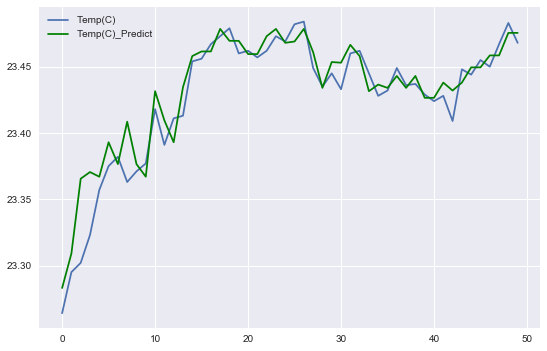

In [343]:
bx = _pred_df15.plot(x=_pred_df15.index, y='Temp(C)', style='-')
_pred_df15.plot(ax=bx, x=_pred_df15.index, y='Temp(C)_Predict', style='g-')

## Other Method - train_test_split in kNN regression

In [376]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(_enter_15.iloc[:100].values, _outs_15.iloc[:100].values, test_size=0.3, random_state=42)
print(len(x_train))
print(len(x_test))

70
30


Saída esperada:  [23.504]
Saída predita:  [23.476]


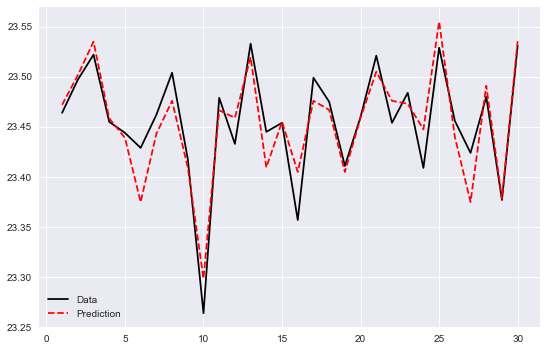

In [383]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2, p=2)   # n_neighbors=número de vizinhos e p=distância euclidiana
knn.fit(x_train, y_train)
outputs = knn.predict(x_test)
print('Saída esperada: ',y_test[7])
print('Saída predita: ',outputs[7])
plt.plot(np.linspace(1, 30, 30), y_test, label='Data', color='black')
plt.plot(np.linspace(1, 30, 30), outputs, '--', label='Prediction', color='red')
plt.legend(loc='best')
plt.show()